In [15]:
import datetime
import pandas as pd
import pandas_ta as ta
import mrigutilities as mu
import interface.web.webdashboard as wdb
import strategies.stocks as stk
import research.analytics as ra
import kite.kite_account as ka
import mriggraphics as mg
import yfinance as yf
import mrigstatics as ms
from plotly.offline import plot
import plotly.graph_objs as go
import plotly.subplots as subplt
import numpy as np
import seaborn as sb


headers = {
    "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:88.0) Gecko/20100101 Firefox/88.0"
}

engine = mu.sql_engine()
kite_object = ka.kite_account()

to_date = datetime.date.today()
from_date = to_date - datetime.timedelta(days=70)
data = kite_object.getHistorical(877057, from_date, to_date, 'day')
quote = kite_object.getQuoteLive('TATAPOWER')
print(quote)

'''
CSS color:
                aliceblue, antiquewhite, aqua, aquamarine, azure,
                beige, bisque, black, blanchedalmond, blue,
                blueviolet, brown, burlywood, cadetblue,
                chartreuse, chocolate, coral, cornflowerblue,
                cornsilk, crimson, cyan, darkblue, darkcyan,
                darkgoldenrod, darkgray, darkgrey, darkgreen,
                darkkhaki, darkmagenta, darkolivegreen, darkorange,
                darkorchid, darkred, darksalmon, darkseagreen,
                darkslateblue, darkslategray, darkslategrey,
                darkturquoise, darkviolet, deeppink, deepskyblue,
                dimgray, dimgrey, dodgerblue, firebrick,
                floralwhite, forestgreen, fuchsia, gainsboro,
                ghostwhite, gold, goldenrod, gray, grey, green,
                greenyellow, honeydew, hotpink, indianred, indigo,
                ivory, khaki, lavender, lavenderblush, lawngreen,
                lemonchiffon, lightblue, lightcoral, lightcyan,
                lightgoldenrodyellow, lightgray, lightgrey,
                lightgreen, lightpink, lightsalmon, lightseagreen,
                lightskyblue, lightslategray, lightslategrey,
                lightsteelblue, lightyellow, lime, limegreen,
                linen, magenta, maroon, mediumaquamarine,
                mediumblue, mediumorchid, mediumpurple,
                mediumseagreen, mediumslateblue, mediumspringgreen,
                mediumturquoise, mediumvioletred, midnightblue,
                mintcream, mistyrose, moccasin, navajowhite, navy,
                oldlace, olive, olivedrab, orange, orangered,
                orchid, palegoldenrod, palegreen, paleturquoise,
                palevioletred, papayawhip, peachpuff, peru, pink,
                plum, powderblue, purple, red, rosybrown,
                royalblue, saddlebrown, salmon, sandybrown,
                seagreen, seashell, sienna, silver, skyblue,
                slateblue, slategray, slategrey, snow, springgreen,
                steelblue, tan, teal, thistle, tomato, turquoise,
                violet, wheat, white, whitesmoke, yellow,
                yellowgreen
'''

CANDLE_PATTERNS = ['CDL_2CROWS',
       'CDL_3BLACKCROWS', 'CDL_3INSIDE', 'CDL_3LINESTRIKE', 'CDL_3OUTSIDE',
       'CDL_3STARSINSOUTH', 'CDL_3WHITESOLDIERS', 'CDL_ABANDONEDBABY',
       'CDL_ADVANCEBLOCK', 'CDL_BELTHOLD', 'CDL_BREAKAWAY',
       'CDL_CLOSINGMARUBOZU', 'CDL_CONCEALBABYSWALL', 'CDL_COUNTERATTACK',
       'CDL_DARKCLOUDCOVER', 'CDL_DOJI_10_0.1', 'CDL_DOJISTAR',
       'CDL_DRAGONFLYDOJI', 'CDL_ENGULFING', 'CDL_EVENINGDOJISTAR',
       'CDL_EVENINGSTAR', 'CDL_GAPSIDESIDEWHITE', 'CDL_GRAVESTONEDOJI',
       'CDL_HAMMER', 'CDL_HANGINGMAN', 'CDL_HARAMI', 'CDL_HARAMICROSS',
       'CDL_HIGHWAVE', 'CDL_HIKKAKE', 'CDL_HIKKAKEMOD', 'CDL_HOMINGPIGEON',
       'CDL_IDENTICAL3CROWS', 'CDL_INNECK', 'CDL_INSIDE', 'CDL_INVERTEDHAMMER',
       'CDL_KICKING', 'CDL_KICKINGBYLENGTH', 'CDL_LADDERBOTTOM',
       'CDL_LONGLEGGEDDOJI', 'CDL_LONGLINE', 'CDL_MARUBOZU', 'CDL_MATCHINGLOW',
       'CDL_MATHOLD', 'CDL_MORNINGDOJISTAR', 'CDL_MORNINGSTAR', 'CDL_ONNECK',
       'CDL_PIERCING', 'CDL_RICKSHAWMAN', 'CDL_RISEFALL3METHODS',
       'CDL_SEPARATINGLINES', 'CDL_SHOOTINGSTAR', 'CDL_SHORTLINE',
       'CDL_SPINNINGTOP', 'CDL_STALLEDPATTERN', 'CDL_STICKSANDWICH',
       'CDL_TAKURI', 'CDL_TASUKIGAP', 'CDL_THRUSTING', 'CDL_TRISTAR',
       'CDL_UNIQUE3RIVER', 'CDL_UPSIDEGAP2CROWS', 'CDL_XSIDEGAP3METHODS']
BULLISH_PATTERN = ['CDL_HAMMER','CDL_INVERTEDHAMMER','CDL_ENGULFING','CDL_PIERCING','CDL_MORNINGSTAR','CDL_3WHITESOLDIERS']
BEARISH_PATTERN = ['CDL_HANGINGMAN', 'CDL_SHOOTINGSTAR', 'CDL_EVENINGSTAR','CDL_ENGULFING', 'CDL_3BLACKCROWS', 'CDL_DARKCLOUDCOVER']
CONT_PATTERN = ['CDL_DOJI_10_0.1','CDL_SPINNINGTOP']

ALL_PATTERNS = [
    "2crows", "3blackcrows", "3inside", "3linestrike", "3outside", "3starsinsouth",
    "3whitesoldiers", "abandonedbaby", "advanceblock", "belthold", "breakaway",
    "closingmarubozu", "concealbabyswall", "counterattack", "darkcloudcover", "doji",
    "dojistar", "dragonflydoji", "engulfing", "eveningdojistar", "eveningstar",
    "gapsidesidewhite", "gravestonedoji", "hammer", "hangingman", "harami",
    "haramicross", "highwave", "hikkake", "hikkakemod", "homingpigeon",
    "identical3crows", "inneck", "inside", "invertedhammer", "kicking", "kickingbylength",
    "ladderbottom", "longleggeddoji", "longline", "marubozu", "matchinglow", "mathold",
    "morningdojistar", "morningstar", "onneck", "piercing", "rickshawman",
    "risefall3methods", "separatinglines", "shootingstar", "shortline", "spinningtop",
    "stalledpattern", "sticksandwich", "takuri", "tasukigap", "thrusting", "tristar",
    "unique3river", "upsidegap2crows", "xsidegap3methods"
]


AttributeError: 'NoneType' object has no attribute 'historical_data'

In [ ]:
def plotly_candlestick(ticker, data_ohlcv,smas=[],levelFlag=False):
    if 'date' in data_ohlcv.columns:
        data_ohlcv['timestamp'] = data_ohlcv['date']
    data_ohlcv.rename(columns={'date': 'Date', 'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close','volume':'Volume'},
                     inplace=True)
    data_ohlcv['colors_vol'] = data_ohlcv.Close - data_ohlcv.Close.shift(1)
    data_ohlcv['colors_vol'] = data_ohlcv['colors_vol'].apply(lambda x: 'green' if x > 0 else 'red') 

    startDate = min(data_ohlcv['Date'])
    endDate = max(data_ohlcv['Date'])

    levels = []
    if levelFlag:
        levels = mu.getLevels(ticker,startDate,endDate)
        levels = [x[1] for x in levels[0]]
        print(levels)
    
    for sma in smas:
        data_ohlcv['MA_'+str(sma)] = data_ohlcv['Close'].rolling(window=sma).mean()
        
    sma_colors = ['purple', 'blue','darkcyan','teal']
    
    # Make Subplot of 2 rows to plot 2 graphs sharing the x axis
    fig = subplt.make_subplots(rows=2,
                           cols=1,
                           shared_xaxes=True,
                           vertical_spacing=0.04)

    fig.add_trace(go.Candlestick(x=data_ohlcv['Date'],
                                         open=data_ohlcv['Open'],
                                         high=data_ohlcv['High'],
                                         low=data_ohlcv['Low'],
                                         close=data_ohlcv['Close'],
                                         increasing_line_color='green',
                                         decreasing_line_color='red',
                                         name='Price'), row=1,col=1)
    
    for sma,lcolor in list(zip(smas,sma_colors)):
        fig.add_trace( go.Scatter(x=data_ohlcv['Date'],
                                 y=data_ohlcv['MA_'+str(sma)],
                              line=dict(color=lcolor,
                                           width=1,
                                           shape='spline'), # smooth the line
                                 name='MA_'+str(sma)), row=1,col=1)

    for l in levels:
        fig.add_trace( go.Scatter(x=data_ohlcv['Date'],
                                 y= pd.Series(l, index=np.arange(len(data_ohlcv['Date']))),
                              line=dict(color='grey',
                                           width=1,
                                           shape='spline'),name='Level',showlegend=False),
                                  row=1,col=1)

    # Add Volume Chart to Row 2 of subplot
    fig.add_trace(go.Bar(x=data_ohlcv['Date'],
                         y=data_ohlcv['Volume'],
                         marker_color=list(data_ohlcv['colors_vol'].values)
                         ,name='Volume'), row = 2, col = 1)

    # Update Price Figure layout
    fig.update_layout(title= ticker + ' Price & Volume Chart',
    yaxis1_title = 'Price',
    yaxis2_title = 'Volume',
    # xaxis2_title = ‘Time’,
    xaxis1_rangeslider_visible = False,
    xaxis2_rangeslider_visible = False)


    return fig

In [14]:
tapo = stk.Stock('ASHOKLEY')
tapo.get_price_vol(period='3M')
ohlcv = tapo.pricevol_data
# print(ohlcv.tail(2))
# mg.plotly_tech_indicators(tapo.symbol, ohlcv, ['MACD', 'MACDS'],subplots=2)
ohlcv = ohlcv[['open','high','low','close']]
# ohlcv.set_index('date',inplace=True)
ohlcv.ta.cdl_pattern(name="all", append=True)
CANDLE_PATTERNS = ['CDL_2CROWS',
       'CDL_3BLACKCROWS', 'CDL_3INSIDE', 'CDL_3LINESTRIKE', 'CDL_3OUTSIDE',
       'CDL_3STARSINSOUTH', 'CDL_3WHITESOLDIERS', 'CDL_ABANDONEDBABY',
       'CDL_ADVANCEBLOCK', 'CDL_BELTHOLD', 'CDL_BREAKAWAY',
       'CDL_CLOSINGMARUBOZU', 'CDL_CONCEALBABYSWALL', 'CDL_COUNTERATTACK',
       'CDL_DARKCLOUDCOVER', 'CDL_DOJI_10_0.1', 'CDL_DOJISTAR',
       'CDL_DRAGONFLYDOJI', 'CDL_ENGULFING', 'CDL_EVENINGDOJISTAR',
       'CDL_EVENINGSTAR', 'CDL_GAPSIDESIDEWHITE', 'CDL_GRAVESTONEDOJI',
       'CDL_HAMMER', 'CDL_HANGINGMAN', 'CDL_HARAMI', 'CDL_HARAMICROSS',
       'CDL_HIGHWAVE', 'CDL_HIKKAKE', 'CDL_HIKKAKEMOD', 'CDL_HOMINGPIGEON',
       'CDL_IDENTICAL3CROWS', 'CDL_INNECK', 'CDL_INSIDE', 'CDL_INVERTEDHAMMER',
       'CDL_KICKING', 'CDL_KICKINGBYLENGTH', 'CDL_LADDERBOTTOM',
       'CDL_LONGLEGGEDDOJI', 'CDL_LONGLINE', 'CDL_MARUBOZU', 'CDL_MATCHINGLOW',
       'CDL_MATHOLD', 'CDL_MORNINGDOJISTAR', 'CDL_MORNINGSTAR', 'CDL_ONNECK',
       'CDL_PIERCING', 'CDL_RICKSHAWMAN', 'CDL_RISEFALL3METHODS',
       'CDL_SEPARATINGLINES', 'CDL_SHOOTINGSTAR', 'CDL_SHORTLINE',
       'CDL_SPINNINGTOP', 'CDL_STALLEDPATTERN', 'CDL_STICKSANDWICH',
       'CDL_TAKURI', 'CDL_TASUKIGAP', 'CDL_THRUSTING', 'CDL_TRISTAR',
       'CDL_UNIQUE3RIVER', 'CDL_UPSIDEGAP2CROWS', 'CDL_XSIDEGAP3METHODS']

BULLISH_PATTERN = ['CDL_HAMMER','CDL_INVERTEDHAMMER','CDL_ENGULFING','CDL_PIERCING','CDL_MORNINGSTAR','CDL_3WHITESOLDIERS']
BEARISH_PATTERN = ['CDL_HANGINGMAN', 'CDL_SHOOTINGSTAR', 'CDL_EVENINGSTAR','CDL_ENGULFING', 'CDL_3BLACKCROWS', 'CDL_DARKCLOUDCOVER']
CONT_PATTERN = ['CDL_DOJI_10_0.1','CDL_SPINNINGTOP']

for inx in ohlcv.index[::-1]:
    for col in BULLISH_PATTERN:
        try:
            if ohlcv.loc[inx,col] > 0:
                # print(list(ohlcv.columns[0:7])+[col])
                print(pd.DataFrame(ohlcv.loc[inx,list(ohlcv.columns[0:4])+[col]]))
        except:
            pass
    


[*********************100%%**********************]  1 of 1 completed

               2024-07-24
open               228.00
high               233.50
low                227.15
close              232.50
CDL_ENGULFING      100.00
               2024-06-24
open               233.60
high               241.40
low                231.23
close              240.30
CDL_ENGULFING      100.00



F:\Mrig Analytics\mrigAnalytics\mrigutilities.py:348: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

F:\Mrig Analytics\mrigAnalytics\strategies\stocks.py:93: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\santoshbag\AppData\Local\Temp\ipykernel_17180\3649125648.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\santoshbag\AppData\Local\Temp\ipykernel_17180\36491

In [ ]:
# taporet.sort_index(inplace=True)
# taporet
fig = go.Figure(data=[go.(x=taporet.index,
                y= taporet['cum_ret'], name='TATAPOWER'),
                     go.Scatter(x=b1ret.index,
                y= b1ret['cum_ret'], name='NIFTY 50'),
                     go.Scatter(x=b2ret.index,
                y= b2ret['cum_ret'], name='NIFTY ENERGY')])
fig

In [ ]:
figure = plotly_candlestick('TATAPOWER',data,[10,20,30],levelFlag=True)
# print(figure.layout)
figure.update_layout(width =700, height=300,
                 yaxis_domain = [0.2, 1.0],
                 yaxis2_domain = [0.0, 0.2])
figure.update_xaxes(showline=True,
         linewidth=2,
         linecolor='ivory',
         mirror=True)

# figure.update_yaxes(showline=True,
#          linewidth=2,
#          linecolor='ligthyellow',
#          mirror=True)
figure.update_layout(
    margin=dict(l=0,r=0,b=10,t=50,pad=1),
    paper_bgcolor="ivory"
    )

figure



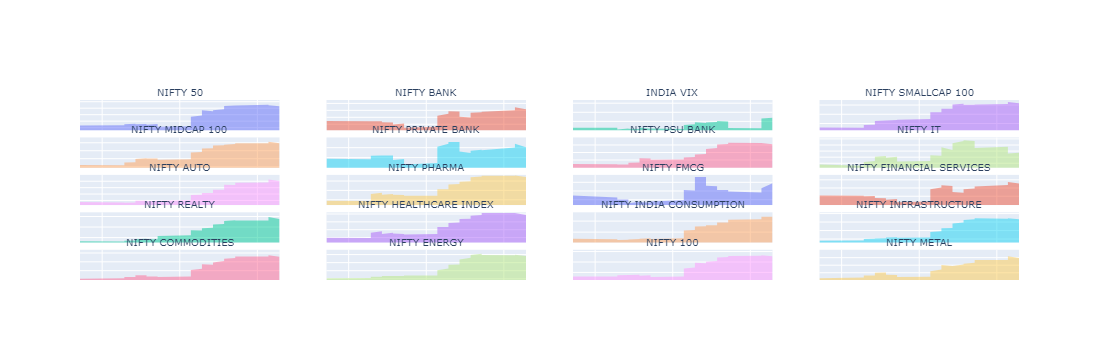

In [5]:
import plotly.express as px

indices = ["NIFTY 50","NIFTY BANK","INDIA VIX","NIFTY SMALLCAP 100",
"NIFTY MIDCAP 100","NIFTY PRIVATE BANK","NIFTY PSU BANK","NIFTY IT","NIFTY AUTO",
"NIFTY PHARMA","NIFTY FMCG","NIFTY FINANCIAL SERVICES","NIFTY REALTY",
"NIFTY HEALTHCARE INDEX","NIFTY INDIA CONSUMPTION","NIFTY INFRASTRUCTURE","NIFTY COMMODITIES",
"NIFTY ENERGY","NIFTY 100","NIFTY METAL"
]
engine = mu.sql_engine()
fig = subplt.make_subplots(rows=5,
                       cols=4,
                       shared_xaxes=True,
                       vertical_spacing=0.04,
                          subplot_titles=indices)
sql = """
select date, symbol, close from stock_history where symbol in {} 
and date > now() - interval '360 days' order by date desc
"""    
inx = str(indices).replace('[','(').replace(']',')')
inx_data = pd.read_sql(sql.format(inx),engine)
# inx_data

coord = []
for i in [1,2,3,4,5]:
    for j in [1,2,3,4]:
        coord.append((i,j))
for crd,indx in list(zip(coord,range(0,20))):
    # print(indx)
    fig.add_trace( go.Scatter(x=inx_data['date'],
                             y=inx_data[inx_data['symbol'] == indices[indx]]['close'],fill='tozeroy',mode='none'
             ,showlegend = False), row=crd[0],col=crd[1])
    fig['layout']['yaxis'+str(indx+1)].update(range=[min(inx_data[inx_data['symbol'] == indices[indx]]['close'].values), 
                                                       max(inx_data[inx_data['symbol'] == indices[indx]]['close'].values)])
   
#     fig.layout.annotations[indx+1]['text'] = indices[indx]
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.update_annotations(font_size=10)

fig

In [ ]:
import plotly.graph_objects as go

fig = subplt.make_subplots(rows=1,
                       cols=1,
                       shared_yaxes=True,
                       vertical_spacing=0.0,
                          subplot_titles='levels')
fig.add_trace(go.Bar(
            x=[20, 14, 23],
            y=['giraffes', 'orangutans', 'monkeys'],
            orientation='h'),1,1)
fig.add_trace(go.Bar(
            x=[-10, -15, -40],
            y=['giraffes', 'orangutans', 'monkeys'],
            orientation='h'),1,1)

fig.show()

In [ ]:
# define a function to display the analytics for the selected stock
def display_analytics(stocks='NIFTY 100'):
    # get the stock name from the entry box
    df = pd.DataFrame()
    cnt = 1
    
    engine = mu.sql_engine()
    period_date = datetime.date.today() - datetime.timedelta(days=180)
    
    print('<<<<<<<<<<'+str(stocks)+'>>>>>>>>>>')
    
    if stocks == 'NIFTY 100':
        slist = str(ms.NIFTY_100).replace('{','(').replace('}',')')
    elif stocks == 'NIFTY 50':
        slist = str(ms.NIFTY_50).replace('{','(').replace('}',')')
    else:
        slist = str(stocks).replace('[','(').replace(']',')')

    slist = slist.replace(')',",'NIFTY 50','NIFTY BANK')")
    sql = "select date,symbol, high as High,low as Low,close as Close from stock_history where \
    symbol in {} and date > '{}' \
    order by symbol, date asc".format(slist,period_date.strftime('%Y%m%d'))
    # print(sql)
    data = pd.read_sql(sql,engine)
    
    CustomStrategy = ta.Strategy(
    name="Momo and Volatility",
    description="SMA 50,200, BBANDS, RSI, MACD and Volume SMA 20",
    ta=[
        {"kind": "sma", "length": 20},
        {"kind": "sma", "length": 50},        
        {"kind": "macd"},
        {"kind": "bbands", "length": 20,"std":2},
        {"kind": "supertrend", "period": 7,"multiplier":3},
        {"kind": "stochrsi"},

    ]
    )
    

    def apply_strat(x):
        x.ta.strategy(CustomStrategy)
        return x

    newdf = data.groupby(['symbol']).apply(apply_strat)    
    
#     for stock in slist: #['SBIN','TATAMOTORS']: #ms.NIFTY_50:
#     # for stock in ['SBIN','TATAPOWER']:
#     # get the stock data from Yahoo Finance using pandas_datareader
#     # data = pdr.get_data_yahoo(stock_name)
#         columnmap = {'MACD_12_26_9':'MACD',
#                      'MACDh_12_26_9':'MACD_H',
#                      'MACDs_12_26_9':'MACD_S',
#                      'SUPERT_7_3.0':'SuperTrend',
#                      'BBL_20_2.0':'BollingB_L',
#                      'BBM_20_2.0':'BollingB_M',
#                      'BBU_20_2.0':'BollingB_U',
#                      'STOCHRSIk_14_14_3_3':'STOCH_RSI_k',
#                      'STOCHRSId_14_14_3_3':'STOCH_RSI_d'
#             }
        
#         data = yf.download(stock+'.NS',period='6mo')
#         data = data[['High', 'Low', 'Close']]
#         data['stock'] = stock
#         macd = ta.macd(data['Close'])
#         supertrend = ta.supertrend(data['High'], data['Low'], data['Close'], period=7, multiplier=3)
#         bb = ta.bbands(data['Close'],length=20,std=2)
#         stocRSI = ta.stochrsi(data['Close'])
#         # print(macd.columns)
#         # print(supertrend.columns)
#         # print(bb.columns)
#         # print(stocRSI.columns)
#         data = pd.merge(data,supertrend['SUPERT_7_3.0'],left_index=True,right_index=True)
#         data = pd.merge(data,macd,left_index=True,right_index=True)
#         data = pd.merge(data,bb[['BBL_20_2.0','BBM_20_2.0','BBU_20_2.0']],left_index=True,right_index=True)
#         data = pd.merge(data,stocRSI[['STOCHRSIk_14_14_3_3' ,'STOCHRSId_14_14_3_3']],left_index=True,right_index=True)
        
#         data.drop(columns=['High', 'Low'],inplace=True)
#         data.rename(columnmap,axis=1,inplace=True)
#         if cnt == 1:
#             df = data.tail(1)
#         else:
#             df = pd.concat([df,data.tail(1)])
#         cnt = cnt + 1
#     stock_col = df.pop('stock')
#     df.insert(0,'Security',stock_col)
    return newdf
#     return df.round(2)  


In [ ]:
TA = display_analytics()

In [ ]:
TA[TA['symbol'] == 'BAJAJFINSV']

In [ ]:
'''MACD_12_26_9  MACDh_12_26_9 MACDs_12_26_9  SUPERT_7_3.0  SUPERTd_7_3.0  
    SUPERTl_7_3.0 SUPERTs_7_3.0  
When both the Supertrend and MACD are in line (+/-) then its a confirmation to 
take a buy (+) or sell (-) position

'''

pd.set_option("display.max_rows", None)
stocksdf = pd.DataFrame()
for stock in sorted(set(TA['symbol'])):
    # print(stock)    
    df = TA[TA['symbol'] == stock].tail(5)
    df['opinion'] = 'NAL'
    # try:
    if len(df) > 3: 
        # print(df[['symbol','close','SUPERT_7_3.0',  'SUPERTd_7_3.0','MACD_12_26_9','opinion']])
        df = pd.DataFrame() if (df.head(1)['SUPERTd_7_3.0'].values[0] == df.tail(1)['SUPERTd_7_3.0'].values[0]) else df
        if len(df.columns) > 0:
            # print(df[['symbol','close','SUPERT_7_3.0',  'SUPERTd_7_3.0','MACD_12_26_9','opinion']])
            if ((df.tail(1)['MACD_12_26_9'].values[0] > 0) and (df.tail(1)['SUPERTd_7_3.0'].values[0] > 0)):
                # print('BUY')
                df['opinion'] = 'BUY'
                df = df.tail(1)
            elif ((df.tail(1)['MACD_12_26_9'].values[0] < 0) and (df.tail(1)['SUPERTd_7_3.0'].values[0] < 0)):
                df['opinion'] = 'SELL'
                df = df.tail(1)
                # print('SELL')
            elif ((df.tail(1)['MACD_12_26_9'].values[0] > 0) and (df.tail(1)['SUPERTd_7_3.0'].values[0] < 0)):
                df['opinion'] = 'CAUTIOUS SELL'
                df = df.tail(1)
                # print('SELL')
            elif ((df.tail(1)['MACD_12_26_9'].values[0] < 0) and (df.tail(1)['SUPERTd_7_3.0'].values[0] > 0)):
                df['opinion'] = 'CAUTIOUS BUY'
                df = df.tail(1)
                # print('SELL')            
            else:
                df['opinion'] = 'NA'
    # except:
        # pass
    # print(df.head(1)['SUPERTd_7_3.0'].values,df.tail(1)['SUPERTd_7_3.0'].values)
    stocksdf = pd.concat([stocksdf,df])
# stocksdf
print(stocksdf[['symbol','close','SUPERT_7_3.0',  'SUPERTd_7_3.0','MACD_12_26_9','opinion']])

In [ ]:
symbol = 'HDFCBANK.NS'
start_date = datetime.date(2024,3,12)
end_date = datetime.date(2024,3,13)
'''
BASIC INFO
df.fast_info
['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 
'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 
'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

EARNINGS
df.earnings_dates





'''



# help(yf.Ticker)
# df = yf.download(symbol,period='1d',interval='1m')
# print(str(df.head(1).index[0]).split('+')[0])
df = yf.Ticker(symbol)
# for key in df.fast_info.keys():
#     print(key,' ; ',df.fast_info[key])

# df.earnings_dates

In [ ]:
'''
SPOT FUT SPREAD 
'''

pd.set_option("display.max_rows", None)
symbol = 'TATAPOWER'
sql = "select date, 'spot' as expiry, close from stock_history where symbol = '%s' and date > (now() - interval '1 year') order by date desc"
spot = pd.read_sql(sql%(symbol),engine)
expiry = ['20240328','20240425','20240530']
sql = "select date, expiry ,close from futures_options_history \
        where symbol = '%s' and option_type not in ('CE','PE') \
        and date > (now() - interval '1 year') order by date desc"
fut = pd.read_sql(sql%(symbol),engine)
spot_fut = pd.concat([spot,fut])

In [ ]:
pd.set_option("display.max_rows", None)

spot_fut_p = spot_fut.pivot(index=['date'],columns=['expiry'],values=['close'])
spot_fut_p.columns = spot_fut_p.columns.droplevel(level=0)
# spot_fut_p
spot_fut_new = pd.DataFrame()
for i in range(0,len(spot_fut_p)):
    try:
        df = pd.DataFrame(spot_fut_p.iloc[i]).dropna().transpose()
        # print(df)
    # df.columns[0]
        df = df.rename(columns={df.columns[0]: "near",df.columns[1]: "mid",df.columns[2]: "far",df.columns[3]: "spot"})
        spot_fut_new = pd.concat([spot_fut_new,df])
    except:
        pass

spot_fut_new['near_sprd'] = spot_fut_new['near'] - spot_fut_new['spot']
spot_fut_new['mid_sprd'] = spot_fut_new['mid'] - spot_fut_new['near']
spot_fut_new['far_sprd'] = spot_fut_new['far'] - spot_fut_new['mid']
spot_fut_new.sort_index(ascending=False)

# spot_fut_new[['near_sprd'	,'mid_sprd'	,'far_sprd']].plot()

In [ ]:
'''
CORRELATION ANALYSIS
'''

symbol = 'TATAPOWER'
sql = "select * from return_correlations where stock = '%s' and date > (now() - interval '2 year') order by date desc"
corr = pd.read_sql(sql%(symbol),engine)


In [ ]:
corr[['nifty_250_corr','nifty_150_corr']].plot()